# 1.One Hot Encoding

One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

Each one of the boolean variables are also known as **dummy variables** or binary variables.

In [1]:
import pandas as pd

data = pd.read_csv('titanic.csv', usecols=['Sex'])
data.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [2]:
# one hot encoding
pd.get_dummies(data).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [3]:
# for better visualisation
pd.concat([data, pd.get_dummies(data)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


As you may have noticed, we only need 1 of the 2 dummy variables to represent the original categorical variable Sex. Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.

Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable. 

To extend this concept, to encode  categorical variable with k labels, we need k-1 dummy variables.

In [4]:
# obtaining k-1 labels
pd.get_dummies(data, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


### Notes

Both pandas and sklearn will provide a whole set of dummy variables from a categorical variable. This is, instead of returning k-1 binary variables, they will return k, with the option in pandas of dropping the first binary variable and obtain k-1.

### When should you use k and when k-1?

When the original variable is binary, that is, when the original variable has only 2 labels, then you should create **one and only one** binary variable.

When the original variable has more than 2 labels, the following is important:

#### One hot encoding into k-1:
One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that. 

One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.

And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.

#### One hot encoding into k dummy variables

However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.

In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# let's make a copy of the dataset, in which we encode the categorical variables using OHE

data_OHE = pd.concat([data[['Pclass', 'Age', 'SibSp','Parch', 'Survived']], # numerical variables 
                      pd.get_dummies(data.Sex, drop_first=True),   # binary categorical variable
                      pd.get_dummies(data.Embarked, drop_first=True)],  # k categories in categorical
                    axis=1)

data_OHE.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [8]:
# and now let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data_OHE[['Pclass', 'Age', 'SibSp',
                                                              'Parch', 'male', 'Q', 'S']].fillna(0),
                                                    data_OHE.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [9]:
# and finally a logistic regression

logit = LogisticRegression(random_state=44)
logit.fit(X_train, y_train)
print('Train set')
pred = logit.predict_proba(X_train)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = logit.predict_proba(X_test)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.8452745059760092
Test set
Logistic Regression roc-auc: 0.8424404761904761


c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## One Hot encoding: 

### Advantages

- Straightforward to implement
- Makes no assumption
- Keeps all the information of the categorical variable

### Disadvantages

- Does not add any information that may make the variable more predictive
- If the variable has loads of categories, then OHE increases the feature space dramatically

If we performed OHE in the variable Cabin that contains 148 different labels, we would end up with 147 variables, where originally there was one. If we have a few categorical variables like this, we would end up with huge datasets. Therefore, OHE is not always the best option to encode categorical variables.

### Notes

If our datasets have a few multi-label variables, we will end up very soon with datasets with thousands of columns or more. And this may make training of our algorithms slow.

In addition, many of these dummy variables may be similar to each other, since it is not unusual for 2 or more variables to share the same combinations of 1 and 0s.

## One Hot Encoding - variables with many categories


limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.

In [10]:
import pandas as pd
import numpy as np


data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [11]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


In [12]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(data, drop_first=True).shape

(4209, 117)

In [13]:
# let's find the top 10 most frequent categories for the variable X2
data.X2.value_counts().sort_values(ascending=False).head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [14]:
# let's make a list with the most frequent categories of the variable

top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [15]:
# and now we make the 10 binary variables

for label in top_10:
    data[label] = np.where(data['X2']==label, 1, 0)

data[['X2']+top_10].head(10)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [16]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)

# read the data again
data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

# encode X2 into the 10 most frequent categories
one_hot_top_x(data, 'X2', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [17]:
# find the 10 most frequent categories for X1
top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

# now create the 10 most frequent dummy variables for X1
one_hot_top_x(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### One Hot encoding of top variables

### Advantages

- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space (number of columns in the dataset)

### Disadvantages

- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels


Because it is not unusual that categorical variables have a few dominating categories and the remaining labels add mostly noise, this is a quite simple and straightforward approach that may be useful on many occasions.

It is worth noting that the top 10 variables is a totally arbitrary number. You could also choose the top 5, or top 20.

# 2.Ordinal numbering encoding


Categorical variable which categories can be meaningfully ordered are called ordinal. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week can be ordinal with Monday = 1, and Sunday = 7.
- Educational level, with the categories: Elementary school,  High school, College graduate, PhD ranked from 1 to 4.

When the categorical variable is ordinal, the most straightforward approach is to replace the labels by some ordinal number.

### Advantages

- Keeps the semantical information of the variable (human readable content)
- Straightforward

### Disadvantage

- Does not add machine learning valuable information

In [18]:
import pandas as pd
import datetime

In [19]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 30 days difference from today
# and then transform it into a datafame

base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 30)]
df = pd.DataFrame(date_list)
df.columns = ['day']
df

,day
0,2020-06-19 08:31:04.005491
1,2020-06-18 08:31:04.005491
2,2020-06-17 08:31:04.005491
3,2020-06-16 08:31:04.005491
4,2020-06-15 08:31:04.005491
5,2020-06-14 08:31:04.005491
6,2020-06-13 08:31:04.005491
7,2020-06-12 08:31:04.005491
8,2020-06-11 08:31:04.005491
9,2020-06-10 08:31:04.005491


In [20]:
# extract the week day name

df['day_of_week'] = df['day'].dt.weekday_name
df.head()

,day,day_of_week
0,2020-06-19 08:31:04.005491,Friday
1,2020-06-18 08:31:04.005491,Thursday
2,2020-06-17 08:31:04.005491,Wednesday
3,2020-06-16 08:31:04.005491,Tuesday
4,2020-06-15 08:31:04.005491,Monday


In [21]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(10)

,day,day_of_week,day_ordinal
0,2020-06-19 08:31:04.005491,Friday,5
1,2020-06-18 08:31:04.005491,Thursday,4
2,2020-06-17 08:31:04.005491,Wednesday,3
3,2020-06-16 08:31:04.005491,Tuesday,2
4,2020-06-15 08:31:04.005491,Monday,1
5,2020-06-14 08:31:04.005491,Sunday,7
6,2020-06-13 08:31:04.005491,Saturday,6
7,2020-06-12 08:31:04.005491,Friday,5
8,2020-06-11 08:31:04.005491,Thursday,4
9,2020-06-10 08:31:04.005491,Wednesday,3


# 3.Count or frequency encoding

Another way to refer to variables that have a multitude of categories, is to call them variables with **high cardinality**.

We observed in the previous lecture, that if a categorical variable contains multiple labels, then by re-encoding them using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

There is not any rationale behind this transformation, other than its simplicity.

### Advantages

- Simple
- Does not expand the feature space

### Disadvantages

-  If 2 labels appear the same amount of times in the dataset, that is, contain the same number of observations, they will be merged: may loose valuable information
- Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# let's open the mercedes benz dataset for demonstration

data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'])
data.head()

,y,X1,X2,X3,X4,X5,X6
0,130.81,v,at,a,d,u,j
1,88.53,t,av,e,d,y,l
2,76.26,w,n,c,d,x,j
3,80.62,t,n,f,d,x,l
4,78.02,v,n,f,d,h,d


In [23]:
# let's have a look at how many labels

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


### Important

When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) **over the training set**, and then use those numbers to replace the labels in the test set.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [25]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

X_train.X2.value_counts().to_dict()

{'as': 1155,
 'ae': 342,
 'ai': 289,
 'm': 284,
 'ak': 188,
 'r': 101,
 'n': 97,
 's': 63,
 'e': 61,
 'f': 59,
 'aq': 46,
 'ay': 40,
 'a': 34,
 't': 17,
 'k': 16,
 'i': 15,
 'ag': 15,
 'z': 14,
 'b': 12,
 'd': 12,
 'ao': 10,
 'g': 10,
 'ac': 10,
 'x': 8,
 'y': 8,
 'at': 5,
 'ap': 5,
 'h': 4,
 'ah': 3,
 'an': 3,
 'au': 3,
 'al': 3,
 'q': 3,
 'av': 2,
 'aw': 2,
 'p': 1,
 'aa': 1,
 'am': 1,
 'l': 1,
 'o': 1,
 'af': 1,
 'c': 1}

In [26]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,ai,c,d,q,g
3014,b,m,c,d,q,i
3368,o,f,f,d,s,l
2772,aa,as,d,d,p,j
3383,v,e,c,d,s,g


In [27]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


### Note


If a category is present in the test set, that was not present in the train set, this method will generate missing data in the test set. This is why it is extremely important to handle rare categories

Then we can combine rare label replacement plus categorical encoding with counts like this: we may choose to replace the 10 most frequent labels by their count, and then group all the other labels under one label (for example "Rare"), and replace "Rare" by its count, to account for what I just mentioned.

# 4.Target guided ordinal encoding

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Create a monotonic relationship between the variable and the target
- Do not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Ordering  labels according to the target

Ordering the labels according to the target means assigning a number to the label, but this numbering, this ordering, is informed by the mean of the target within the label.

Briefly, we calculate the mean of the target for each label/category, then we order the labels according to these mean from smallest to biggest, and we number them accordingly.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [30]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [31]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique()) # check number of different labels in Cabin

148

In [32]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [33]:
# check the labels again, we have much less categories in Cabin now

data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The ordering of the labels should be done considering the target ONLY on the training set, and then expanded it to the test set.

In [34]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Cabin', 'Survived']], data.Survived, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [35]:
# now we order the labels according to the mean target value

X_train.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.303609
A    0.428571
G    0.500000
C    0.571429
F    0.666667
D    0.692308
E    0.740741
B    0.774194
Name: Survived, dtype: float64

In [36]:
# now we generate an ordered list with the labels

X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'D', 'E', 'B'], dtype='object', name='Cabin')

In [37]:
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [38]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'D': 6, 'E': 7, 'B': 8}

In [39]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

X_train['Cabin_ordered'] = X_train.Cabin.map(ordinal_label)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordinal_label)

In [40]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,7
52,D,1,6
386,M,0,1
124,D,0,6
578,M,0,1


Text(0, 0.5, 'Survived')

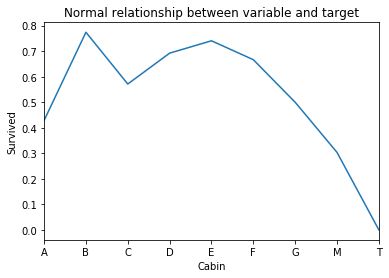

In [41]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

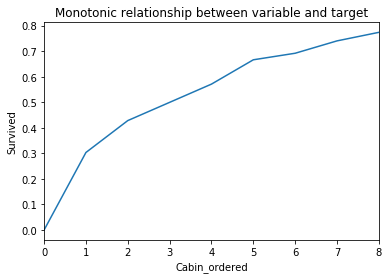

In [42]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

There is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand, as we explained in previous sections.

# 5.Mean encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, we learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Creates a monotonic relationship between the variable and the target
- Does not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".


### Replace labels by the Risk Factor

Replacing labels by the risk factor means essentially replacing the label by the mean of the target for that label. 

I have only seen this procedure applied in classifications scenarios, where the target can take just the values of 1 or 0. However, in principle, I don't see why this shouldn't be possible as well when the target is continuous. Just be mindful of over-fitting.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [45]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [46]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique()) # check number of different labels in Cabin

148

In [47]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [48]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The risk factor should be calculated per label considering ONLY on the training set, and then expanded it to the test set.
See below.

In [49]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [50]:
# let's calculate the target frequency for each label

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [51]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.7741935483870968,
 'C': 0.5714285714285714,
 'D': 0.6923076923076923,
 'E': 0.7407407407407407,
 'F': 0.6666666666666666,
 'G': 0.5,
 'M': 0.3036093418259023,
 'T': 0.0}

In [52]:
# replace the labels with the 'risk' (target frequency)
# note that we calculated the frequencies based on the training set only

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [53]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


Text(0, 0.5, 'Survived')

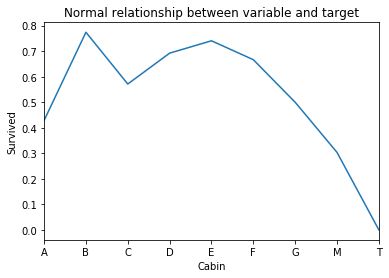

In [54]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

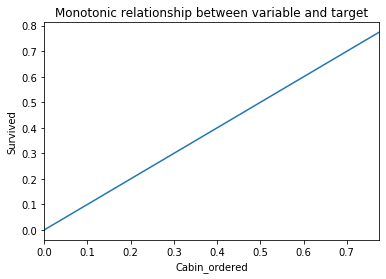

In [55]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

Here the relationship lies perfectly on a diagonal line, because this is how we replaced the categories. 

# 6.Probability ratio encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, you learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Creates a monotonic relationship between the variable and the target
- Does not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".


### Replace labels by joint probability of the target being 1 or 0

For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the labels by that ratio.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [58]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [59]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [60]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [61]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The calculation of the probability ratios to replace the labels should be done considering ONLY on the training set, and then expanded it to the test set.
See below.

In [62]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [63]:
# let's calculate the probability of Survived (target=1)
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [64]:
# let's make a dataframe with the above

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [65]:
# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [66]:
#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000000,1.000000,0.000000


In [67]:
# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

{'A': 0.75,
 'B': 3.428571428571428,
 'C': 1.3333333333333333,
 'D': 2.25,
 'E': 2.8571428571428563,
 'F': 1.9999999999999998,
 'G': 1.0,
 'M': 0.4359756097560975,
 'T': 0.0}

In [68]:
ordered_labels = prob_df['ratio'].to_dict()

In [69]:
# replace the labels with the ratios

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [70]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,2.857143
52,D,1,2.250000
386,M,0,0.435976
124,D,0,2.250000
578,M,0,0.435976


Text(0, 0.5, 'Survived')

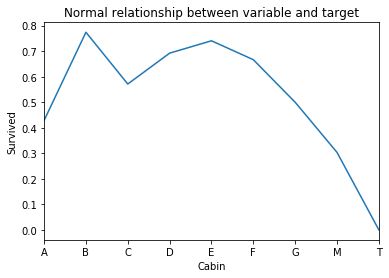

In [71]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

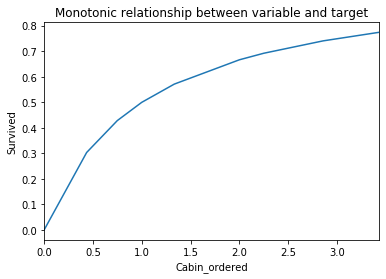

In [72]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

# 7.Weight  of evidence

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

It is computed from the basic odds ratio: ln( (Proportion of Good Credit Outcomes) / (Proportion of Bad Credit Outcomes))

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It establishes a monotonic relationship to the dependent variable.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables, can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has three drawbacks:

- May incur in loss of information (variation) due to binning to few categories (we will discuss this further in the discretisation section)
- It does not take into account correlation between independent variables
- Prone to cause over-fitting


For more details follow this link:

http://documentation.statsoft.com/StatisticaHelp.aspx?path=WeightofEvidence/WeightofEvidenceWoEIntroductoryOverview

Let's see how to implement WoE in python

In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [75]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [76]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [77]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [78]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The calculation of the WoE to replace the labels should be done considering the ONLY the training set, and then expanded it to the test set.

In [79]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [80]:
# now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [81]:
# let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [82]:
# and now the probability of target = 0 
# and we add it to the dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [83]:
# since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [84]:
# now we calculate the WoE

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [85]:
# and we create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.232143681292632,
 'C': 0.28768207245178085,
 'D': 0.8109302162163288,
 'E': 1.0498221244986774,
 'F': 0.6931471805599452,
 'G': 0.0,
 'M': -0.8301689781242366,
 'T': -11.512925464970229}

In [86]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()

In [87]:
# replace the labels with the WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [88]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


Text(0, 0.5, 'Survived')

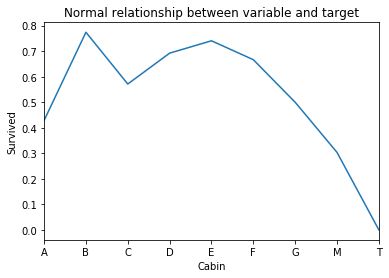

In [89]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

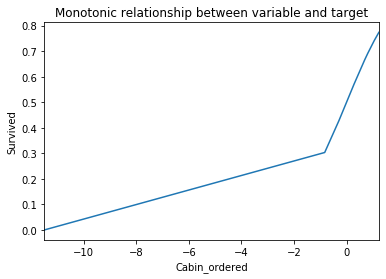

In [90]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

## Comparison of Categorical Variable Encoding

In this lecture, I will compare the performance of the different feature transformations we learnt to replace categorical variables.

I will evaluate:

- One hot encoding
- Replacing labels by the count
- Ordering labels according to target
- Replacing labels by Risk
- WoE

In [91]:
import pandas as pd
import numpy as np

import re # to extract text from string

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [92]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
# let's check how many numerical and categorical variables we have

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
# let's drop non-important columns:
# name and ticket have too many different categories, and Passenger Id is a unique key, non informative

data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [95]:
# let's inspect the dataset
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [96]:
# let's check for missing data

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [97]:
# Embarked and Cabin have missing date and are categorical
# let's fill NA values of categorical variables with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.Embarked.fillna('Missing', inplace=True)

In [98]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,M,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,M,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,M,S


In [99]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 9), (268, 9))

In [100]:
# Let's replace null values in age by a value at right end of distribution

def impute_na(df, variable, extreme):
    df[variable].fillna(extreme, inplace=True)
    
impute_na(X_train, 'Age', X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.mean()+3*X_train.Age.std()) # note how we calculate the end of the distribution on train set 

c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [101]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,1,male,51.00000,0,0,26.5500,E,S
52,1,1,female,49.00000,1,0,76.7292,D,C
386,0,3,male,1.00000,5,2,46.9000,M,S
124,0,1,male,54.00000,0,1,77.2875,D,S
578,0,3,female,73.43632,1,0,14.4583,M,C


In [102]:
# let's check that we have no missing data after NA imputation

X_train.isnull().sum(), X_test.isnull().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Cabin       0
 Embarked    0
 dtype: int64, Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Cabin       0
 Embarked    0
 dtype: int64)

### One Hot Encoding

In [103]:
def get_OHE(df):
    df_OHE = pd.concat([df[['Age', 'Fare', 'Pclass']], 
                         pd.get_dummies(df[[ 'Sex', 'Cabin', 'Embarked']], drop_first=True)],
                        axis=1
                       )
    return df_OHE

X_train_OHE = get_OHE(X_train)
X_test_OHE = get_OHE(X_test)

X_train_OHE.head()

,Age,Fare,Pclass,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Missing,Embarked_Q,Embarked_S
857,51.00000,26.5500,1,1,0,0,0,1,0,0,0,0,0,0,1
52,49.00000,76.7292,1,0,0,0,1,0,0,0,0,0,0,0,0
386,1.00000,46.9000,3,1,0,0,0,0,0,0,1,0,0,0,1
124,54.00000,77.2875,1,1,0,0,1,0,0,0,0,0,0,0,1
578,73.43632,14.4583,3,0,0,0,0,0,0,0,1,0,0,0,0


In [104]:
X_test_OHE.head()

,Age,Fare,Pclass,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_Q,Embarked_S
495,103.157714,14.4583,3,1,0,0,0,0,0,0,1,0,0
648,103.157714,7.5500,3,1,0,0,0,0,0,0,1,0,1
278,7.000000,29.1250,3,1,0,0,0,0,0,0,1,1,0
31,103.157714,146.5208,1,0,1,0,0,0,0,0,0,0,0
255,29.000000,15.2458,3,0,0,0,0,0,0,0,1,0,0


We can see that the test set does not contain the variables Cabin_T and Embarked_Missing. This occurred because those labels are indeed rare, and therefore, when splitting train and test set, they were only left on the train set. 

Perhaps, it would be a good idea to replace them by the most frequent label, as we learnt in previous sections.

In [105]:
# for now, I will just generate the missing column in the test set and fill it with 0s
# given that no observation in the test set is positive for those labels

X_test_OHE.loc[:, 'Cabin_T'] = 0
X_test_OHE.loc[:, 'Embarked_Missing'] = 0

X_train.shape, X_test.shape

((623, 9), (268, 9))

### Categorical to counts

In [106]:
def categorical_to_counts(df_train, df_test):
    # make a temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['Sex', 'Cabin', 'Embarked']:
        # make the dictionary mapping label to counts
        X_frequency_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col] = df_train_temp[col].map(X_frequency_map)
        df_test_temp[col] = df_test_temp[col].map(X_frequency_map)
    
    # drop the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_train_count.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,408,51.00000,0,0,26.5500,27,457
52,1,215,49.00000,1,0,76.7292,26,108
386,3,408,1.00000,5,2,46.9000,471,457
124,1,408,54.00000,0,1,77.2875,26,457
578,3,215,73.43632,1,0,14.4583,471,108


### Categorical to ordered numbers according to target

In [107]:
def categories_to_ordered(df_train, df_test):
    # make a temporary copy of the datasets 
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in [ 'Sex', 'Cabin', 'Embarked']:
        # order the labels according to target mean
        ordered_labels = df_train.groupby([col])['Survived'].mean().sort_values().index
        
        # create the dictionary to map the ordered labels to an ordinal number
        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        
        # remap the categories  to these ordinal numbers
        df_train_temp[col] = df_train[col].map(ordinal_label)
        df_test_temp[col] = df_test[col].map(ordinal_label)
    
    # remove the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp
        
X_train_ordered, X_test_ordered = categories_to_ordered(X_train, X_test)
X_train_ordered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,0,51.00000,0,0,26.5500,7,0
52,1,1,49.00000,1,0,76.7292,6,2
386,3,0,1.00000,5,2,46.9000,1,0
124,1,0,54.00000,0,1,77.2875,6,0
578,3,1,73.43632,1,0,14.4583,1,2


### Categorical to risk factor

In [108]:
def categories_to_risk(df_train, df_test):
    # temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['Sex', 'Cabin', 'Embarked']:
        # make a dictionary mapping labels to the mean target for that label
        risk_dict = df_train.groupby([col])['Survived'].mean().to_dict()
        
        # re-map the labels
        df_train_temp[col] = df_train[col].map(risk_dict)
        df_test_temp[col] = df_test[col].map(risk_dict)
    
    # drop the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)        
    return df_train_temp, df_test_temp
        
X_train_risk, X_test_risk = categories_to_risk(X_train, X_test)
X_train_risk.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,0.196078,51.00000,0,0,26.5500,0.740741,0.341357
52,1,0.753488,49.00000,1,0,76.7292,0.692308,0.564815
386,3,0.196078,1.00000,5,2,46.9000,0.303609,0.341357
124,1,0.196078,54.00000,0,1,77.2875,0.692308,0.341357
578,3,0.753488,73.43632,1,0,14.4583,0.303609,0.564815


### WoE

In [109]:
def categories_to_woe(df_train, df_test):
    # temporary copy of datafranes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in [ 'Sex', 'Cabin', 'Embarked']:
        # create df containing the different parts of the WoE equation
        prob_df = X_train.groupby([col])['Survived'].mean()
        prob_df = pd.DataFrame(prob_df)
        prob_df['Died'] = 1-prob_df.Survived
        
        # remove zero values as the log of zero does not exist
        prob_df.loc[prob_df.Died == 0, 'Died'] = 0.00001
        prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
        
        # calculate WoE
        prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
        woe = prob_df['WoE'].to_dict()
        
        # re-map the labels to WoE
        df_train_temp[col] = df_train[col].map(woe)
        df_test_temp[col] = df_test[col].map(woe)
    
    # drop the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)        
    return df_train_temp, df_test_temp
        
X_train_woe, X_test_woe = categories_to_woe(X_train, X_test)
X_train_woe.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,-1.410987,51.00000,0,0,26.5500,1.049822,-0.657254
52,1,1.117304,49.00000,1,0,76.7292,0.810930,0.260726
386,3,-1.410987,1.00000,5,2,46.9000,-0.830169,-0.657254
124,1,-1.410987,54.00000,0,1,77.2875,0.810930,-0.657254
578,3,1.117304,73.43632,1,0,14.4583,-0.830169,0.260726


In [110]:
def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [111]:
# OHE
run_logistic(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.851852454393614
Test set
Logistic Regression roc-auc: 0.8429761904761904


c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
# counts
run_logistic(X_train_count, X_test_count, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8543198629096983
Test set
Logistic Regression roc-auc: 0.8507142857142859


c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
# ordered labels
run_logistic(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.856141949198499
Test set
Logistic Regression roc-auc: 0.8505357142857143


c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [114]:
# risk factor
run_logistic(X_train_risk, X_test_risk, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8531919047309169
Test set
Logistic Regression roc-auc: 0.8498214285714286


c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
# woe
run_logistic(X_train_woe, X_test_woe, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8555996616125463
Test set
Logistic Regression roc-auc: 0.8514285714285714


c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Bonus: Additional reading resources

### Weight of Evidence

- [WoE Module from StatSoft](http://documentation.statsoft.com/portals/0/formula%20guide/Weight%20of%20Evidence%20Formula%20Guide.pdf)
- [WoE Statistica](http://documentation.statsoft.com/StatisticaHelp.aspx?path=WeightofEvidence/WeightofEvidenceWoEIntroductoryOverview)


### Score card development for credit risk

- [Plug and Score](https://plug-n-score.com/learning/scorecard-development-stages.htm#Binning)
- [Score card development from SAS](http://www.sas.com/storefront/aux/en/spcrisks/59376_excerpt.pdf)

### Windsorization and top/bottom coding

- [Windsorisation](http://www.statisticshowto.com/winsorize/)
- [Censoring data](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1431352)

### Alternative methods of categorical variable encoding

- [Will's blog](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- [Classification of Tutor systems with high cardinality (KDD competition)](http://pslcdatashop.org/KDDCup/workshop/)
- [Light weight solution to KDD data mining challenge](http://pslcdatashop.org/KDDCup/workshop/)

### Several methods described in this course

- [The 2009 Knowledge Discovery in Data Competition (KDD Cup 2009)](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf)

